# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

# Memuat dataset
df = pd.read_csv('/content/drive/My Drive/dataset_clustering.csv')

# Menampilkan beberapa baris pertama dataset
df.head()

Mounted at /content/drive


,gradyear,gender,age,NumberOffriends,sports,social,lifestyle,personal,religion,entertaiment,pca_clusters
0,2007,2,18.400134,0,0.0,0.0,-0.5,0.0,0.0,-0.5,0
1,2007,0,17.410000,49,1.0,0.0,-0.5,1.0,1.0,-0.5,0
2,2007,0,17.511000,41,0.5,3.0,2.0,2.0,1.0,1.0,0
3,2006,0,19.010786,36,0.0,0.0,-0.5,0.0,0.0,-0.5,0
4,2008,0,16.657000,1,2.0,8.0,3.5,0.0,2.0,0.0,0


In [3]:
# Memahami Struktur Data
print("Jumlah baris dan kolom:", df.shape)

# Jenis Data di Setiap Kolom
print(df.info())

Jumlah baris dan kolom: (14824, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14824 entries, 0 to 14823
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gradyear         14824 non-null  int64  
 1   gender           14824 non-null  int64  
 2   age              14824 non-null  float64
 3   NumberOffriends  14824 non-null  int64  
 4   sports           14824 non-null  float64
 5   social           14824 non-null  float64
 6   lifestyle        14824 non-null  float64
 7   personal         14824 non-null  float64
 8   religion         14824 non-null  float64
 9   entertaiment     14824 non-null  float64
 10  pca_clusters     14824 non-null  int64  
dtypes: float64(7), int64(4)
memory usage: 1.2 MB
None


In [5]:
df.describe()

,gradyear,gender,age,NumberOffriends,sports,social,lifestyle,personal,religion,entertaiment,pca_clusters
count,14824.000000,14824.000000,14824.000000,14824.000000,14824.000000,14824.00000,14824.000000,14824.000000,14824.000000,14824.000000,14824.000000
mean,2007.494806,0.352199,17.392977,29.874528,0.743254,0.91561,0.278130,0.457434,0.853346,0.377968,0.201700
std,1.116792,0.637712,1.134571,35.415599,1.195641,2.05095,1.841421,1.128496,2.066838,1.292176,0.401283
min,2006.000000,0.000000,13.843000,0.000000,0.000000,0.00000,-0.500000,0.000000,0.000000,-0.500000,0.000000
25%,2006.000000,0.000000,16.539000,3.000000,0.000000,0.00000,-0.500000,0.000000,0.000000,-0.500000,0.000000
50%,2007.000000,0.000000,17.446000,20.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2008.000000,1.000000,18.400134,44.000000,1.000000,1.00000,0.500000,1.000000,1.000000,0.500000,0.000000
max,2009.000000,2.000000,21.065000,605.000000,16.500000,114.00000,170.500000,22.000000,94.000000,21.500000,1.000000


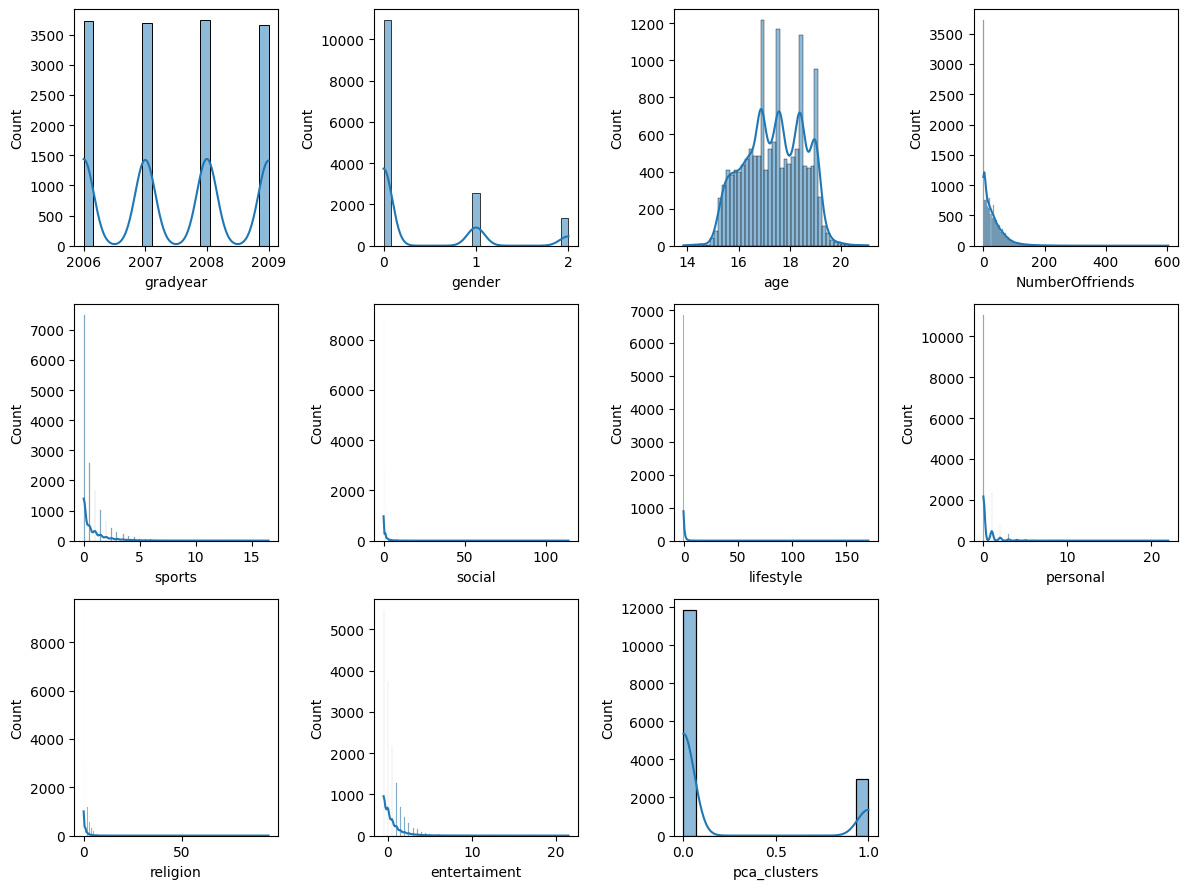

In [8]:
# Distribusi semua fitur
num_cols = len(df.columns)
num_rows = (num_cols + 3) // 4

plt.figure(figsize=(12, 6 * num_rows // 2))
for i, col in enumerate(df.columns, 1):
    plt.subplot(num_rows, 4, i)
    sns.histplot(df[col], kde=True)

plt.tight_layout()
plt.show()

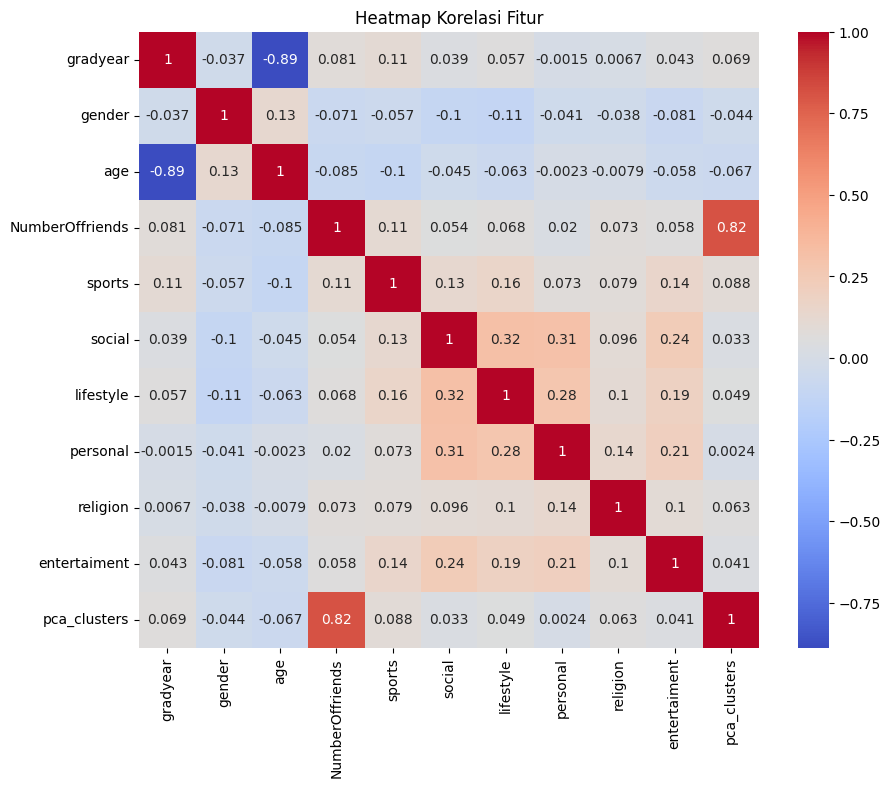

In [13]:
# Heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi Fitur')
plt.show()

**Fitur Terkait**:
   - Kolom dan baris pada heatmap menunjukkan nama fitur, seperti `gradyear`, `gender`, `age`, dll.
   - Contoh:
     - `gradyear` memiliki korelasi negatif yang kuat dengan `age` (-0.88).
     - `NumberOfFriends` memiliki korelasi positif cukup kuat dengan `pca_clusters` (0.78).
     - Fitur seperti `gender` memiliki korelasi lemah dengan sebagian besar fitur lainnya.

**Interpretasi**:
   - Korelasi tinggi (positif atau negatif) menunjukkan bahwa kedua fitur saling terkait secara linear. Misalnya, ketika `age` meningkat, `gradyear` cenderung menurun karena hubungan negatif yang kuat.
   - Korelasi rendah menunjukkan bahwa fitur tersebut memiliki hubungan linear yang lemah atau tidak signifikan satu sama lain.


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [14]:
# Misalkan kita ingin membagi target menjadi dua kelas: 'High' dan 'Low' berdasarkan median 'pca_clusters'
threshold = df['pca_clusters'].median()

# Mengubah target menjadi kategori: 'High' (1) dan 'Low' (0)
y_class = (df['pca_clusters'] > threshold).astype(int)

# Membagi data menjadi train dan test
X = df.drop(['pca_clusters'], axis=1)  # Menggunakan kolom lainnya sebagai fitur
y = y_class  # Target yang sudah dikategorikan

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Inisialisasi scaler
scaler = MinMaxScaler()

# Pilih semua kolom numerik
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns

# Terapkan MinMaxScaler pada fitur numerik
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# Memastikan bentuk set pelatihan dan set uji
print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training set shape: X_train=(11859, 10), y_train=(11859,)
Test set shape: X_test=(2965, 10), y_test=(2965,)


In [16]:
df.head()

,gradyear,gender,age,NumberOffriends,sports,social,lifestyle,personal,religion,entertaiment,pca_clusters
0,2007,2,18.400134,0,0.0,0.0,-0.5,0.0,0.0,-0.5,0
1,2007,0,17.410000,49,1.0,0.0,-0.5,1.0,1.0,-0.5,0
2,2007,0,17.511000,41,0.5,3.0,2.0,2.0,1.0,1.0,0
3,2006,0,19.010786,36,0.0,0.0,-0.5,0.0,0.0,-0.5,0
4,2008,0,16.657000,1,2.0,8.0,3.5,0.0,2.0,0.0,0


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [17]:
# Inisialisasi model klasifikasi
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
svm = SVC()

# Melatih model knn
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Melatih model dt
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Melatih model rf
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Melatih model svm
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

print("Model Sudah Dibuat")

Model Sudah Dibuat


Tulis narasi atau penjelasan algoritma yang Anda gunakan.

Kode tersebut menunjukkan proses pelatihan dan evaluasi beberapa algoritma machine learning untuk klasifikasi.
###**Inisialisasi Model Klasifikasi**###
Beberapa algoritma klasifikasi diinisialisasi untuk memprediksi label target (`y_train` dan `y_test`). Berikut adalah algoritma yang digunakan:

1. **K-Nearest Neighbors (KNN)**:
   - Algoritma berbasis tetangga terdekat, yang mengklasifikasikan data baru berdasarkan kelas mayoritas dari tetangga terdekatnya di ruang fitur.
   - Parameter utama: jumlah tetangga `n_neighbors`.

2. **Decision Tree (DT)**:
   - Model berbasis pohon keputusan yang memecah data menjadi subset yang lebih kecil berdasarkan aturan atau threshold tertentu.
   - Keuntungan: Mudah diinterpretasi, bekerja baik untuk data kategoris dan numerik.

3. **Random Forest (RF)**:
   - Algoritma ensemble yang membangun banyak pohon keputusan (decision tree) dan menggabungkan hasilnya untuk meningkatkan akurasi.
   - Keuntungan: Mengurangi risiko overfitting dibandingkan satu pohon keputusan.

4. **Support Vector Machine (SVM)**:
   - Model yang mencari hyperplane optimal yang memisahkan data dari dua kelas dengan margin terbesar.
   - Cocok untuk data dengan dimensi tinggi dan masalah klasifikasi linear/non-linear (dengan kernel tertentu).

---

###**Proses Pelatihan dan Prediksi**###
1. **Pelatihan Model**:
   - Metode `.fit(X_train, y_train)` digunakan untuk melatih model pada data pelatihan (`X_train` dan `y_train`).
   - Model mempelajari hubungan antara fitur (X) dan target (y).

2. **Prediksi**:
   - Setelah model dilatih, `.predict(X_test)` digunakan untuk memprediksi label pada data uji (`X_test`).

3. **Output Prediksi**:
   - Prediksi masing-masing model disimpan dalam variabel:
     - `y_pred_knn`: Prediksi dari KNN.
     - `y_pred_dt`: Prediksi dari Decision Tree.
     - `y_pred_rf`: Prediksi dari Random Forest.
     - `y_pred_svm`: Prediksi dari SVM.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.


Evaluasi Model KNN:
Accuracy: 0.9852
F1-Score: 0.9615
Precision: 0.9786
Recall: 0.9449
Confusion Matrix:
[[2372   12]
 [  32  549]]


Evaluasi Model Decision Tree:
Accuracy: 1.0000
F1-Score: 1.0000
Precision: 1.0000
Recall: 1.0000
Confusion Matrix:
[[2384    0]
 [   0  581]]


Evaluasi Model Random Forest:
Accuracy: 1.0000
F1-Score: 1.0000
Precision: 1.0000
Recall: 1.0000
Confusion Matrix:
[[2384    0]
 [   0  581]]


Evaluasi Model SVM:
Accuracy: 0.9933
F1-Score: 0.9825
Precision: 0.9982
Recall: 0.9673
Confusion Matrix:
[[2383    1]
 [  19  562]]



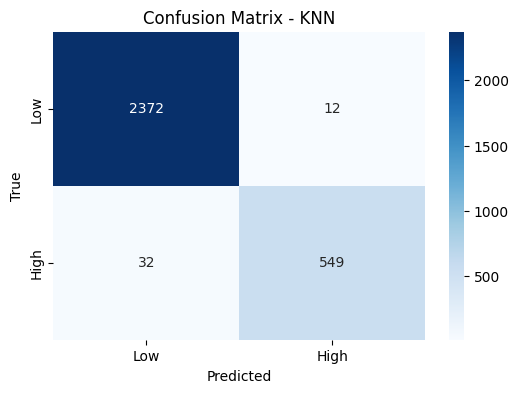

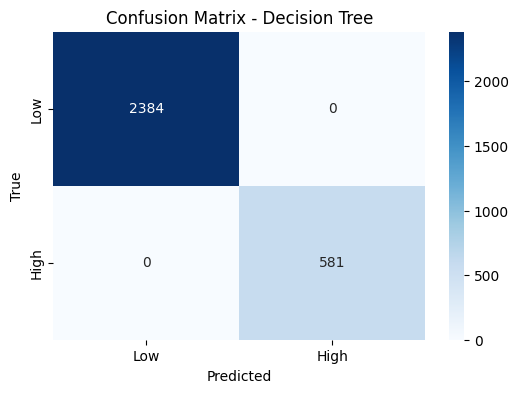

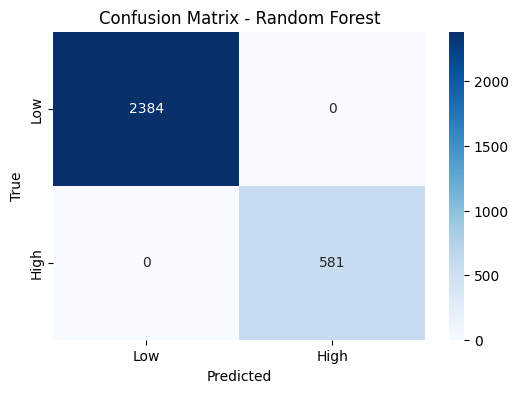

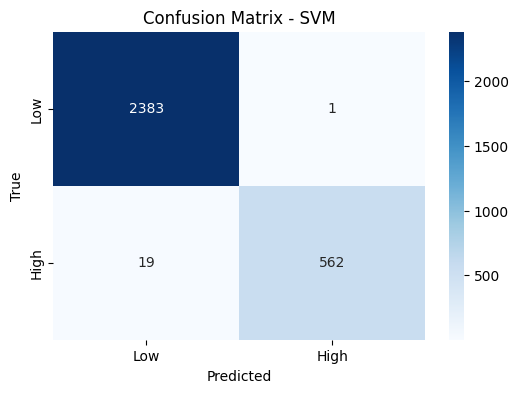

In [18]:
# Menghitung metrik evaluasi untuk setiap model
def evaluate_model(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    return accuracy, f1, precision, recall, conf_matrix

# Evaluasi untuk setiap model
models = {
    "KNN": (knn, y_pred_knn),
    "Decision Tree": (dt, y_pred_dt),
    "Random Forest": (rf, y_pred_rf),
    "SVM": (svm, y_pred_svm),
}

for model_name, (model, y_pred) in models.items():
    accuracy, f1, precision, recall, conf_matrix = evaluate_model(y_test, y_pred)
    print(f"\nEvaluasi Model {model_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"Confusion Matrix:\n{conf_matrix}\n")

# Membuat confusion matrix heatmap untuk visualisasi
def plot_confusion_matrix(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Low", "High"], yticklabels=["Low", "High"])
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

for model_name, (model, y_pred) in models.items():
    plot_confusion_matrix(y_test, y_pred, model_name)

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

####**Evaluasi Berdasarkan Hasil Testing:**####
1. **K-Nearest Neighbors (KNN):**
   - **Accuracy:** 98.52%  
   - **F1-Score:** 96.15%  
   - **Precision:** 97.86%  
   - **Recall:** 94.49%  
   - **Confusion Matrix:**
     
     [[2372   12]
      [  32  549]]
     
   - **Kesimpulan:**  
     KNN menunjukkan performa yang sangat baik dengan akurasi dan F1-Score yang tinggi. Namun, terlihat bahwa ada sedikit kekurangan dalam **recall** (94.49%), yang berarti model ini masih melewatkan beberapa instance dari kelas positif.

2. **Decision Tree:**  
   - **Accuracy:** 100%  
   - **F1-Score:** 100%  
   - **Precision:** 100%  
   - **Recall:** 100%  
   - **Confusion Matrix:**
     
     [[2384    0]
      [   0  581]]
     
   - **Kesimpulan:**  
     Decision Tree memberikan hasil sempurna pada data testing. Namun, performa sempurna ini dapat menjadi indikasi bahwa model mengalami **overfitting** karena hasil training juga menunjukkan akurasi 100%.

3. **Random Forest:**  
   - **Accuracy:** 100%  
   - **F1-Score:** 100%  
   - **Precision:** 100%  
   - **Recall:** 100%  
   - **Confusion Matrix:**
     
     [[2384    0]
      [   0  581]]
     
   - **Kesimpulan:**  
     Sama seperti Decision Tree, Random Forest memberikan hasil sempurna pada data testing. Hal ini menandakan bahwa model mampu menangkap pola dengan sangat baik, namun ada kemungkinan overfitting.

4. **Support Vector Machine (SVM):**  
   - **Accuracy:** 99.33%  
   - **F1-Score:** 98.25%  
   - **Precision:** 99.82%  
   - **Recall:** 96.73%  
   - **Confusion Matrix:**
     
     [[2383    1]
      [  19  562]]
     
   - **Kesimpulan:**  
     SVM menunjukkan performa yang sangat baik dengan akurasi tinggi (99.33%) dan F1-Score yang hampir sempurna (98.25%). Model ini menunjukkan keseimbangan yang baik antara precision dan recall.

---

####**Perbandingan Algoritma**####
1. **Kinerja Terbaik (Testing):**
   - **Decision Tree** dan **Random Forest** memberikan hasil yang sempurna (100%). Namun, hasil ini dapat menunjukkan indikasi **overfitting**, yang perlu dievaluasi lebih lanjut dengan validasi silang.

2. **Model dengan Generalisasi yang Baik:**
   - **SVM** memiliki akurasi dan F1-Score yang sangat tinggi (99.33% dan 98.25%) serta menunjukkan keseimbangan antara precision dan recall, menjadikannya pilihan yang andal untuk generalisasi.

3. **Efisiensi dan Akurasi:**
   - **KNN** memiliki performa yang cukup baik, tetapi sedikit lebih rendah dibanding SVM dalam recall (94.49% vs 96.73%). KNN juga cenderung kurang efisien pada dataset besar karena kebutuhan menghitung jarak untuk setiap instance.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [ ]:
#Type your code here

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [ ]:
#Type your code here

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

###**Analisis Model**###

1. **KNN**  
   - **Kelebihan**:  
     Performa model cukup baik dengan **accuracy** 98.52% dan **F1-Score** 96.15%. Tidak ada indikasi overfitting, karena perbedaan antara hasil training dan testing cukup kecil.
   - **Kelemahan**:  
     **Recall** untuk kelas tertentu (kelas 1) lebih rendah (94.49%), yang menunjukkan bahwa model masih kesulitan mendeteksi beberapa kasus positif.
   - **Indikasi**:  
     Performa KNN sangat dipengaruhi oleh distribusi data dan parameter seperti jumlah tetangga (**k**) yang digunakan. Mengubah nilai **k** atau menggunakan teknik lain untuk menyeimbangkan data bisa membantu.

2. **Decision Tree**  
   - **Kelebihan**:  
     Hasil evaluasi sangat baik dengan **accuracy**, **F1-Score**, **precision**, dan **recall** semuanya mencapai 100%. Tidak ada kesalahan dalam prediksi.
   - **Kelemahan**:  
     Potensi **overfitting** sangat tinggi karena model memberikan hasil yang sempurna pada data training dan testing. Ini bisa berarti model terlalu mempelajari detail data yang ada.
   - **Indikasi**:  
     Decision Tree cenderung mengalami **overfitting** jika tidak dikontrol dengan teknik seperti pruning atau pengaturan parameter lainnya.

3. **Random Forest**  
   - **Kelebihan**:  
     Hasil evaluasi sangat baik dan konsisten, mirip dengan Decision Tree, namun lebih tahan terhadap overfitting berkat sifat **ensemble** yang ada di dalamnya.
   - **Indikasi**:  
     Random Forest bisa memberikan hasil yang sempurna karena jumlah estimator yang banyak, yang membantu mengurangi variabilitas dan menghindari model terlalu mempelajari data.

4. **SVM**  
   - **Kelebihan**:  
     SVM menunjukkan performa yang sangat baik dengan **accuracy** 99.33% dan **F1-Score** 98.25%. Precision sangat tinggi (99.82%), menunjukkan bahwa model jarang memberikan prediksi positif yang salah.
   - **Kelemahan**:  
     **Recall** sedikit lebih rendah (96.73%), yang menunjukkan ada beberapa kasus positif yang tidak terdeteksi oleh model.
   - **Indikasi**:  
     SVM cenderung bekerja optimal jika kernel yang tepat dipilih, tetapi ada ruang untuk meningkatkan **recall**, misalnya dengan menyeimbangkan data atau tuning parameter.

---

###**Indikasi Overfitting/Underfitting**###

- **Overfitting**:  
  Terindikasi pada **Decision Tree** yang menunjukkan hasil sempurna pada training dan testing, yang bisa berarti model terlalu mempelajari data yang ada.
  
- **Underfitting**:  
  Tidak ada indikasi **underfitting** pada model-model ini, karena perbedaan antara performa training dan testing cukup kecil.

---

###**Rekomendasi Tindakan Lanjutan**###

1. **Pengoptimalan Parameter**:  
   - **KNN**: Cobalah mencari nilai **k** yang lebih optimal, misalnya dengan menggunakan **cross-validation** untuk menemukan nilai terbaik.
   - **SVM**: Uji berbagai kernel, seperti **linear**, **polynomial**, atau **RBF** untuk melihat mana yang memberikan hasil terbaik.
   - **Decision Tree**: Pertimbangkan untuk melakukan **pruning** atau atur parameter **max depth** untuk menghindari model menjadi terlalu kompleks dan overfit.

2. **Peningkatan Data**:  
   - Tambahkan data baru untuk meningkatkan generalisasi model, khususnya untuk kelas minoritas yang sulit dideteksi.
   - Cobalah teknik **augmentasi** atau **balancing data** untuk meningkatkan **recall** pada kelas yang kurang terprediksi.

3. **Eksplorasi Prapemrosesan**:  
   - Uji metode prapemrosesan yang lebih ketat, seperti **normalisasi** untuk KNN atau **scaling** yang lebih tepat untuk SVM.

4. **Ensemble Learning**:  
   - Pertimbangkan untuk mengkombinasikan beberapa model seperti KNN dan SVM untuk memanfaatkan kekuatan masing-masing, atau gunakan metode **boosting** seperti AdaBoost untuk meningkatkan performa.

5. **Analisis Hasil**:  
   - Lakukan investigasi lebih lanjut pada kasus-kasus yang salah prediksi di confusion matrix, terutama untuk kelas-kelas yang sering salah terdeteksi. Ini bisa memberi wawasan untuk perbaikan lebih lanjut.

Dengan melakukan beberapa tindakan tersebut, performa model diharapkan akan meningkat dan bisa menangkap pola data dengan lebih baik.